<a href="https://colab.research.google.com/github/anjali481/covid_deep_learning/blob/master/Covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.layers  import AveragePooling2D
from tensorflow.keras.layers import  Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


In [ ]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.22
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.0
dm-tree==0.1.6
docopt==0.6.2
docutils==0.17
dopam

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset= ("/content/gdrive/My Drive/Data")

In [ ]:

args={}
args['dataset']=dataset

In [ ]:
dataset

'/content/gdrive/My Drive/Data'

In [ ]:
args

{'dataset': '/content/gdrive/My Drive/Data'}

**Data preprocessing **
labelizing the images 

In [ ]:

import numpy as np
import cv2
import os
from imutils import paths
	

iPaths=list(paths.list_images(args['dataset']))

data=[]
labels=[]

for iPath in iPaths:
    label=iPath.split(os.path.sep)[-2]
    image=cv2.imread(iPath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image =cv2.resize(image,(224, 224))
    data.append(image)
    labels.append(label)



data=np.array(data)/255.0
labels=np.array(labels)


In [ ]:
labels

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

In [ ]:

import os
from google.colab import files

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data_dir=("/content/gdrive/My Drive/Data//")

In [ ]:

import os
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
Cimages=os.listdir(dataset+"/Covid")
Nimages=os.listdir(dataset+"/Normal")


In [ ]:

Nimages


['IM-0230-0001.jpeg',
 'IM-0253-0001.jpeg',
 'IM-0289-0001.jpeg',
 'IM-0251-0001.jpeg',
 'IM-0205-0001.jpeg',
 'IM-0279-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0249-0001.jpeg',
 'IM-0220-0001.jpeg',
 'IM-0295-0001.jpeg',
 'IM-0235-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0221-0001.jpeg',
 'IM-0211-0001.jpeg',
 'IM-0257-0001.jpeg',
 'IM-0242-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0262-0001.jpeg',
 'IM-0240-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0286-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0277-0001.jpeg',
 'IM-0245-0001.jpeg',
 'IM-0276-0001.jpeg',
 'IM-0278-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpeg',
 'IM-0217-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0282-0001.jpeg',
 'IM-0293-0001.jpeg',
 'IM-0283-0001.jpeg',
 'IM-0236-0001.jpeg',
 'IM-0229-0001.jpeg',
 'IM-0239-0001.jpeg',
 'IM-0256-0001.jpeg',
 'IM-0234-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0274-0001.jpeg',
 'IM-0219-0001.jpeg',
 'IM-0209-

Normal and chest


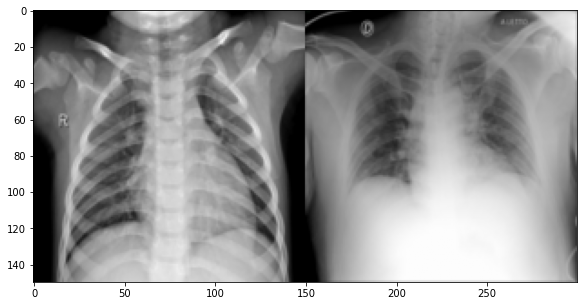

Normal and chest


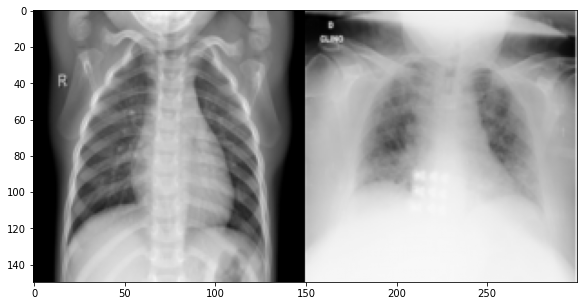

Normal and chest


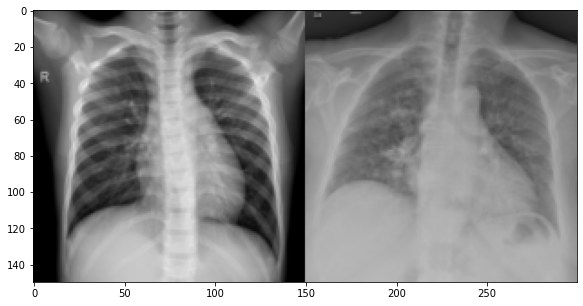

Normal and chest


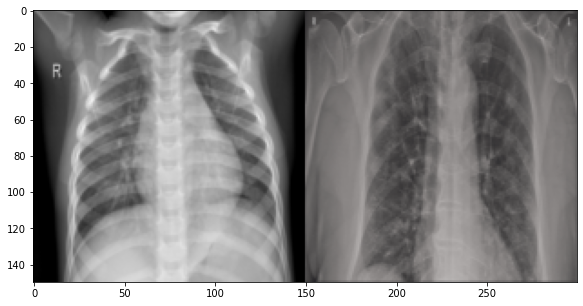

Normal and chest


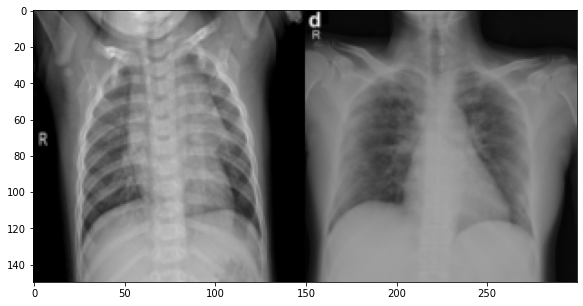

In [ ]:
import matplotlib.pyplot as plt

import cv2
import skimage
from skimage.transform import resize
import numpy as np

def plotter(i):
  normal=cv2.imread(Data_dir+"Normal//"+Nimages[i])
  normal=skimage.transform.resize(normal,(150,150,3))
  coronavirus=cv2.imread(Data_dir+"Covid//"+Cimages[i])
  coronavirus=skimage.transform.resize(coronavirus,(150,150,3),mode="reflect")
  pair=np.concatenate((normal,coronavirus),axis=1)
  print("Normal and chest")
  plt.figure(figsize=(10,5))
  plt.imshow(pair)
  plt.show()
for i in range(0,5):
  plotter(i)  


In [ ]:
LB=LabelBinarizer()
labels=LB.fit_transform(labels)
labels=to_categorical(labels)
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [ ]:
(X_train,X_test,Y_train,Y_test)=train_test_split(data,labels,test_size=0.20 ,random_state=42,stratify=labels)


In [ ]:

X_train

array([[[[0.4       , 0.4       , 0.4       ],
         [0.40392157, 0.40392157, 0.40392157],
         [0.40392157, 0.40392157, 0.40392157],
         ...,
         [0.43529412, 0.43529412, 0.43529412],
         [0.49803922, 0.49803922, 0.49803922],
         [0.42352941, 0.42352941, 0.42352941]],

        [[0.39607843, 0.39607843, 0.39607843],
         [0.4       , 0.4       , 0.4       ],
         [0.40392157, 0.40392157, 0.40392157],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.45490196, 0.45490196, 0.45490196],
         [0.27058824, 0.27058824, 0.27058824]],

        [[0.39607843, 0.39607843, 0.39607843],
         [0.40784314, 0.40784314, 0.40784314],
         [0.4       , 0.4       , 0.4       ],
         ...,
         [0.44313725, 0.44313725, 0.44313725],
         [0.29411765, 0.29411765, 0.29411765],
         [0.2745098 , 0.2745098 , 0.2745098 ]],

        ...,

        [[0.01568627, 0.01568627, 0.01568627],
         [0.00392157, 0.00392157, 0.00392157]

In [ ]:
X_train.shape

(160, 224, 224, 3)

In [ ]:
trainAug=ImageDataGenerator(rotation_range=15,fill_mode="nearest")

In [ ]:
trainAug

In [ ]:
bmodel=VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:

bmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
hmodel=bmodel.output
hmodel=AveragePooling2D(pool_size=(4,4))(hmodel)
hmodel=Flatten(name="flatten")(hmodel)
hmodel=Dense(64,activation="relu")(hmodel)
hmodel=Dropout(0.5)(hmodel)

hmodel=Dense(2,activation="softmax")(hmodel)

model=Model(bmodel.input,hmodel)
for layer in bmodel.layers:
  layer.trainable=False



In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:

X_train.shape

(160, 224, 224, 3)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


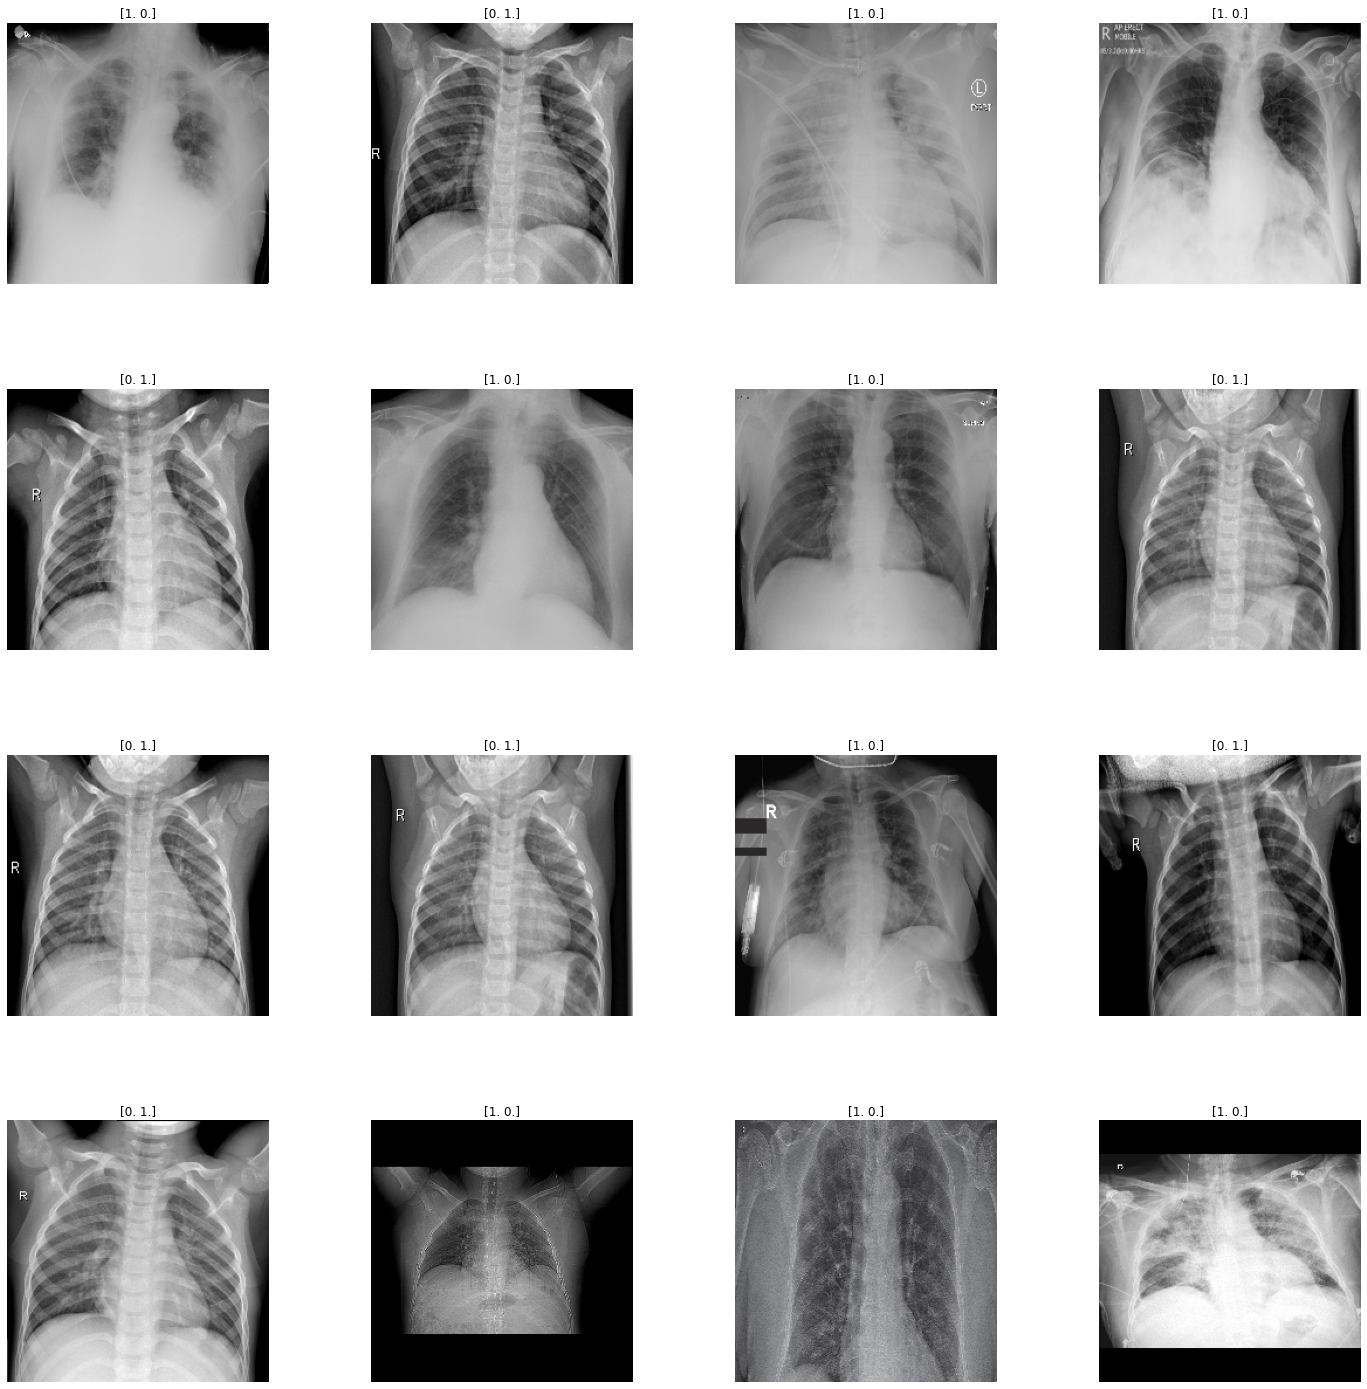

In [ ]:

fig,axes=plt.subplots(4,4,figsize=(25,25))

axes=axes.ravel()

n_training=len(X_train)
for i in np.arange(0,4*4):
  index=np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(Y_train[index])
  axes[i].axis("off")

plt.subplots_adjust(hspace=0.4)  

In [ ]:


INIT_LR = 1e-3
EPOCHS = 8
BS = 8
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
history= model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train)//BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
20/20 [==============================] - 78s 4s/step - loss: 0.7276 - accuracy: 0.5160 - val_loss: 0.5877 - val_accuracy: 0.9500
Epoch 2/8
20/20 [==============================] - 76s 4s/step - loss: 0.6319 - accuracy: 0.6754 - val_loss: 0.5041 - val_accuracy: 0.9500
Epoch 3/8
20/20 [==============================] - 76s 4s/step - loss: 0.5270 - accuracy: 0.8337 - val_loss: 0.4243 - val_accuracy: 0.9500
Epoch 4/8
20/20 [==============================] - 76s 4s/step - loss: 0.4325 - accuracy: 0.9253 - val_loss: 0.3529 - val_accuracy: 1.0000
Epoch 5/8
20/20 [==============================] - 76s 4s/step - loss: 0.3721 - accuracy: 0.9679 - val_loss: 0.2906 - val_accuracy: 0.9750
Epoch 6/8
20/20 [==============================] - 77s 4s/step - loss: 0.2919 - accuracy: 0.9939 - val_loss: 0.2356 - val_accuracy: 1.0000
Epoch 7/8
20/20 [==============================] - 77s 4s/step - loss: 0.2954 - accuracy: 0.9558 - val_loss: 0.2001 - val_accuracy: 1.0000
Epoch 8/8
20/20 [==========

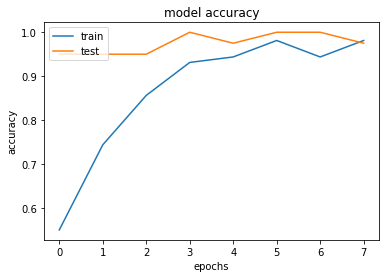

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test,batch_size=BS)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(Y_test.argmax(axis=1),y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      0.95      0.97        20
      Normal       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[19  1]
 [ 0 20]]
acc: 0.9750
sensitivity: 0.9500
specificity: 1.0000


In [ ]:
!pip install flask-ngrok

In [ ]:
model.save("covid_model.h5")

In [ ]:
Y_test.shape

(40, 2)

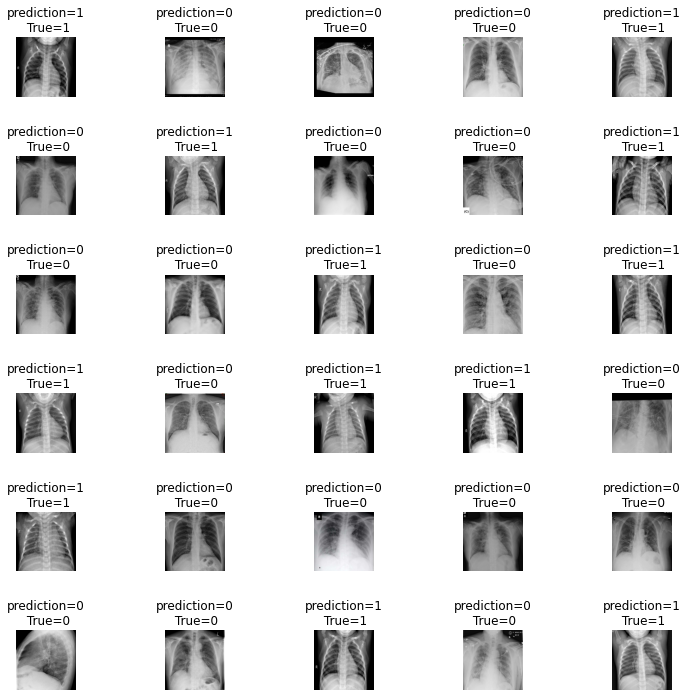

In [ ]:
L=6
W=5

fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
y_pred=model.predict(X_test,batch_size=10)
for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title("prediction={}\n True={}".format(y_pred.argmax(axis=1)[i],Y_test.argmax(axis=1)[i]))
  axes[i].axis("off")

plt.subplots_adjust(wspace=1,hspace=1)


In [ ]:
import tensorflow as tf
from keras.preprocessing import image
model=tf.keras.models.load_model("covid_model.h5")
from keras.applications.vgg16 import preprocess_input



03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg
1-s2.0-S0929664620300449-gr2_lrg-b.jpg

---



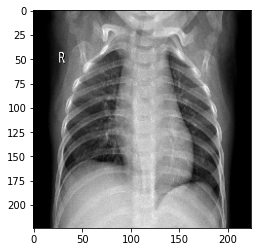

In [ ]:
img=image.load_img("/content/gdrive/MyDrive/Data/Normal/IM-0291-0001.jpeg",target_size=(224,224))
imgplot=plt.imshow(img)


[1]
NORMAL 98.13%


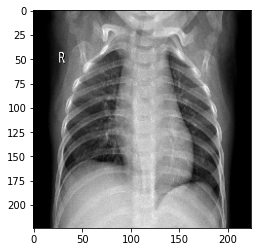

In [ ]:
 label_text = ['COVID19','NORMAL']
 image = np.array(img) / 255.0
 image = np.expand_dims(image, axis=0)
 classes_prob = model.predict(image)
 classes=np.argmax(classes_prob,axis=1)
 class_name = label_text[classes[0]]
 print(classes)
 prob = np.around((classes_prob[0][classes[0]]) *100 , decimals = 2)
 text = class_name + " " + '{}'.format(prob) + '%'
 print(text)
 plt.imshow(img)

In [ ]:

#img_d=preprocess_input(a)


In [ ]:
import streamlit as st

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')
import tensorflow as tf
from keras.preprocessing import image
from flask_ngrok import run_with_ngrok
from flask import Flask
import os
import matplotlib.pyplot as plt
import sys

from keras.models import load_model
from flask import *
import numpy as np
from keras.applications.vgg16 import preprocess_input
import cv2
from keras.preprocessing import image
from PIL import Image
from keras.preprocessing.image import load_img
from tensorflow.python.keras.backend import set_session
INIT_LR = 1e-3
EPOCHS = 5
BS = 8
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)


app = Flask(__name__, template_folder="/content/gdrive/My Drive/Covid-Xray-analyser/")  
run_with_ngrok(app)
global sess
graph2 = tf.Graph()

MODEL_PATH = '/content/gdrive/My Drive/Covid-Xray-analyser/model/keras.h5'





model=tf.keras.models.load_model(MODEL_PATH)

model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])

def model_predict(img_path, model):
    img = image.load_img(img_path,target_size=(224,224))
    imgplot=plt.imshow(img)
    m= np.array(img) / 255.

    m=np.expand_dims(m,axis=0)
    
    classes=model.predict(m)
    print(classes)
    new_pred=np.argmax(classes,axis=1)
    print(new_pred)
    return new_pred


@app.route('/')  
def upload():  
    return render_template("templates/index.html")  
 
@app.route('/', methods = ['POST'])  
def success():
    
    
    if request.method == 'POST':  
        f = request.files['file']
        basepath =os.path.dirname(os.path.realpath('__file__'))
        file_path = os.path.join(
            basepath, 'gdrive/My Drive/Covid-Xray-analyser/uploads', f.filename)
        f.save(file_path)
        

        new=model_predict(file_path, model)
        
        
       
        
        
            

        if(new==[1]):
            return render_template("templates/negative.html")
       
        else:
            return render_template("templates/positive.html")
            
    return None  
  
if __name__ == '__main__':  
    app.run()  


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://754048649407.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [02/May/2021 06:55:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 06:55:20] "GET /static/index.js HTTP/1.1" 404 -
127.0.0.1 - - [02/May/2021 06:55:20] "GET /static/css/main.css HTTP/1.1" 404 -
127.0.0.1 - - [02/May/2021 06:55:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 06:55:21] "GET /static/index.js HTTP/1.1" 404 -
127.0.0.1 - - [02/May/2021 06:55:21] "GET /static/css/main.css HTTP/1.1" 404 -
127.0.0.1 - - [02/May/2021 06:55:22] "GET /static/index.js HTTP/1.1" 404 -
127.0.0.1 - - [02/May/2021 06:55:24] "GET /static/index.js HTTP/1.1" 404 -
127.0.0.1 - - [02/May/2021 06:55:30] "GET /favicon.ico HTTP/1.1" 404 -


[[0.87491417 0.12508586]]
[0]


127.0.0.1 - - [02/May/2021 06:55:41] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 06:55:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 06:56:10] "POST / HTTP/1.1" 200 -


[[0.63628376 0.3637162 ]]
[0]


127.0.0.1 - - [02/May/2021 06:56:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 06:56:43] "POST / HTTP/1.1" 200 -


[[0.9145753  0.08542475]]
[0]


127.0.0.1 - - [02/May/2021 06:58:19] "GET / HTTP/1.1" 200 -


[[0.26808044 0.7319196 ]]
[1]


127.0.0.1 - - [02/May/2021 06:59:33] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 06:59:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/May/2021 07:01:39] "POST / HTTP/1.1" 200 -


[[0.9038297  0.09617029]]
[0]


127.0.0.1 - - [02/May/2021 07:01:43] "GET / HTTP/1.1" 200 -


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

2021-04-28 11:10:55.942 INFO    pyngrok.ngrok: Opening tunnel named: http-80-88f529c1-f83e-420e-8a70-c4930cb7dd35


2021-04-28 11:10:57.281 INFO    pyngrok.process.ngrok: t=2021-04-28T11:10:57+0000 lvl=info msg="no configuration paths supplied"
2021-04-28 11:10:57.286 INFO    pyngrok.process.ngrok: t=2021-04-28T11:10:57+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-04-28 11:10:57.298 INFO    pyngrok.process.ngrok: t=2021-04-28T11:10:57+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-04-28 11:10:57.314 INFO    pyngrok.process.ngrok: t=2021-04-28T11:10:57+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-04-28 11:10:57.406 INFO    pyngrok.process.ngrok: t=2021-04-28T11:10:57+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-04-28 11:10:57.410 INFO    pyngrok.process.ngrok: t=2021-04-28T11:10:57+0000 lvl=info msg="client session established" obj=csess id=756bd53868ca
2021-04-28 11:10:57.428 INFO    pyngrok.process.ngrok: t=2021-04-28T11:10:57+0000 lvl=info msg=start pg=/api/tunnel

<NgrokTunnel: "http://903b7147311a.ngrok.io" -> "http://localhost:80">

In [ ]:
!pip install pyngrok

     |████████████████████████████████| 747kB 16.8MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=eebc28d3d03db44de66895dfde22ec0f10811636d35b570c700f247765a12ccb
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
! ngrok authtoken 1rnNc2wF7osz9WpCGwVU99VTzVM_3y2G8VtWf8yTcv4U7iXER

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok

public_url=ngrok.connect(port='8050')
ssh_url=ngrok.connect(22,"tcp")

In [ ]:
public_url

<NgrokTunnel: "http://b28e6a4057ea.ngrok.io" -> "http://localhost:80">

In [ ]:
pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.22
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.0
dm-tree==0.1.6
docopt==0.6.2
docutils==0.17
dopam